In [5]:
import pandas as pd
from datetime import datetime

- 온라인, 오프라인 카드 사용 내역 데이터를 확인
    1. csv 폴더 안에 있는 오프라인.csv, 온라인.csv 파일을 로드
    2. 두 개의 데이터프레임을 단순한 행 결합(유니언 결합)
        - 두 개의 데이터프레임의 구조 파악
        - 두 개의 데이터프레임의 구조를 같은 형태로 변환
        - 유니언 결합 진행
    3. 기준년월 column의 데이터를 시계열 데이터로 변경
    4. 기준년월, 업종별 총 이용금액의 합계를 그래프로 표현

In [12]:
offline = pd.read_csv('../../csv/card/오프라인.csv', encoding= 'EUC-KR')
online = pd.read_csv('../../csv/card/온라인.csv', encoding= 'CP949') # online은 한글 없어서 ㄱㅊ

In [13]:
offline

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6.283353e+09
2644,202109,편의점,2,60,243768,1.997442e+09
2645,202109,편의점,2,70,40523,3.524203e+08
2646,202109,편의점,2,80,6349,5.333488e+07


In [14]:
online

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337
...,...,...,...,...,...
646,202109,2,50,3237324,181360535814
647,202109,2,60,1019719,70026626874
648,202109,2,70,159261,13091029631
649,202109,2,80,20094,1935122483


In [17]:
# offline의 column의 이름을 변경

offline.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
offline.columns

Index(['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액'], dtype='object')

In [18]:
# online의 column의 이름을 변경

online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']
online.columns

Index(['기준년월', '성별', '연령대', '총이용건수', '총이용금액'], dtype='object')

In [20]:
# online 데이터 프레임에 '업종'column을 추가 -> 데이터 '온라인'

online['업종'] = '온라인'

online.head(2)

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,201901,1,1,1,110685,온라인
1,201901,1,10,2333,98108225,온라인


In [31]:
df = pd.concat([offline, online], axis= 0, ignore_index= True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 0 to 650
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    3299 non-null   int64  
 1   업종      3299 non-null   object 
 2   성별      3299 non-null   int64  
 3   연령대     3299 non-null   int64  
 4   총이용건수   3299 non-null   int64  
 5   총이용금액   3299 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 180.4+ KB


In [ ]:
## pandas에서 지수표현식을 없애기
# pd.options.display.float_format = '{:2f}'.format
# 이러면 e 없앨 수 있지만 0이 너무너무 많아짐

In [32]:
df

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
3294,202109,온라인,2,50,3237324,1.813605e+11
3295,202109,온라인,2,60,1019719,7.002663e+10
3296,202109,온라인,2,70,159261,1.309103e+10
3297,202109,온라인,2,80,20094,1.935122e+09


In [41]:
df['기준년월'] = pd.to_datetime(df['기준년월'], format = '%Y%m')

In [73]:
# 성별 column의 데이터를 1은 남자, 2는 여자로 변경

df_for = df.copy()

df_map = df.copy()

df_replace = df.copy()

In [74]:
# Series.replace()

df_replace['성별'].replace(
    {
        1 : '남자',
        2 : '여자',
        9 : '성별무관',
        '-' : '무응답'
    },
    inplace= True
)

C:\Users\USER\AppData\Local\Temp\ipykernel_31064\3199227950.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_replace['성별'].replace(


In [75]:
# Series.map() (일반함수 | lambda함수)

    # 일반함수

'''def change(x):
    if x == 1:
        return '남성'
    elif x == 2:
        return '여성'
    elif x == 9:
        return '성별무관'
    else:
        return '무응답'
        '''

def change(x):
    result = '무응답'
    if x == 1:
        result = '남성'
    elif x == 2:
        result = '여성'
    elif x == 9:
        result = '성별무관'
    return result

df_map['성별'].map(change)



0       남성
1       남성
2       남성
3       남성
4       남성
        ..
3294    여성
3295    여성
3296    여성
3297    여성
3298    여성
Name: 성별, Length: 3299, dtype: object

In [76]:
    # lambda 함수
        # if 구문을 한줄로 표시 : '조건식이 참인경우 되돌려줄 데이터' if (조건식) else '거짓인 경우 되돌려줄 데이터'
            # lambda 함수의 한계로 한 줄로 표시할 수 밖에 
            # 그래서 한 줄 짜리 if 구문을 길게 늘려서 사용하게 된다.
            # 이러면 일반 함수를 정의하고 그 함수로 map()을 돌리는게 훨씬훨씬 낫다

df_map['성별'].map(
    lambda x : '여성' if x == 2 else ('남성' if x == 1 else ('성별무관' if x == 9 else '무응답'))
)

0       남성
1       남성
2       남성
3       남성
4       남성
        ..
3294    여성
3295    여성
3296    여성
3297    여성
3298    여성
Name: 성별, Length: 3299, dtype: object

In [77]:
df_for['성별'][5]

1

In [78]:
for i in range(len(df_for['성별'])):
    data = df_for.loc[i, '성별']
    if data == 1:
        df_for.loc[i, '성별'] = '남성'
    elif data == 2:
        df_for.loc[i, '성별'] = '여성'
    elif data == 9:
        df_for.loc[i, '성별'] = '성별무관'
    else:
        data = '무응답'

df_for['성별']

C:\Users\USER\AppData\Local\Temp\ipykernel_31064\514440041.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '남성' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_for.loc[i, '성별'] = '남성'


0       남성
1       남성
2       남성
3       남성
4       남성
        ..
3294    여성
3295    여성
3296    여성
3297    여성
3298    여성
Name: 성별, Length: 3299, dtype: object

In [42]:
df

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7.600000e+03
1,2019-01-01,백화점,1,10,379,1.945872e+07
2,2019-01-01,백화점,1,20,45173,4.747711e+09
3,2019-01-01,백화점,1,30,271858,2.791826e+10
4,2019-01-01,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
3294,2021-09-01,온라인,2,50,3237324,1.813605e+11
3295,2021-09-01,온라인,2,60,1019719,7.002663e+10
3296,2021-09-01,온라인,2,70,159261,1.309103e+10
3297,2021-09-01,온라인,2,80,20094,1.935122e+09


In [48]:
df1 = df.pivot_table(
    index= '기준년월',
    columns= '업종',
    values= '총이용금액',
    aggfunc= 'sum'
    # margins = True 로 해두면 합산이 생긴다.
)

In [50]:
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')    

<Axes: xlabel='기준년월'>

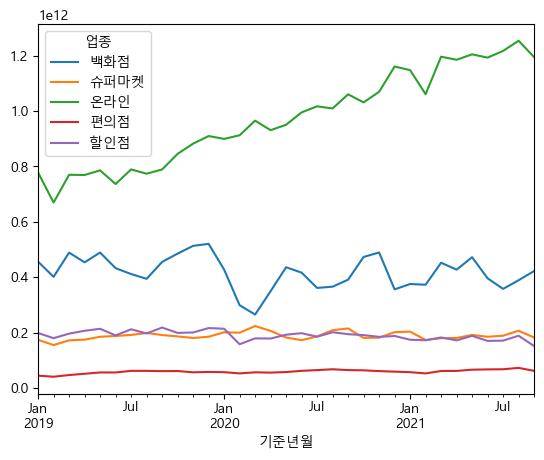

In [51]:
df1.plot(kind = 'line')

In [85]:
## 기준연월별 합산 데이터를 확인

df1['ALL'] = df1.sum(axis= 1) # axis= 1 이러면 column들이 합산되므로 index가 기준이 되어 남아있을거야.

<Axes: xlabel='기준년월'>

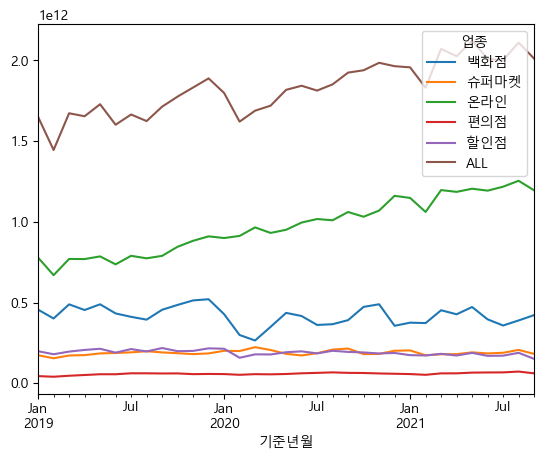

In [88]:
df1.plot(kind = 'line')

In [91]:
df2 = df.pivot_table(
    index= '기준년월',
    columns= '업종',
    values= '총이용금액',
    aggfunc= 'sum',
    margins= True
)

In [92]:
df2

업종,백화점,슈퍼마켓,온라인,편의점,할인점,All
기준년월,,,,,,
2019-01-01 00:00:00,4.558955e+11,1.736131e+11,7.782817e+11,4.408358e+10,1.981718e+11,1.650046e+12
2019-02-01 00:00:00,4.011916e+11,1.546390e+11,6.696276e+11,4.019682e+10,1.795704e+11,1.445225e+12
2019-03-01 00:00:00,4.886521e+11,1.717930e+11,7.699826e+11,4.634686e+10,1.959683e+11,1.672743e+12
2019-04-01 00:00:00,4.536723e+11,1.741783e+11,7.693437e+11,5.093585e+10,2.062539e+11,1.654384e+12
2019-05-01 00:00:00,4.890036e+11,1.846895e+11,7.858765e+11,5.569127e+10,2.134109e+11,1.728672e+12
2019-06-01 00:00:00,4.325099e+11,1.874238e+11,7.366348e+11,5.559312e+10,1.895914e+11,1.601753e+12
2019-07-01 00:00:00,4.113440e+11,1.912817e+11,7.894194e+11,6.148315e+10,2.116533e+11,1.665182e+12
2019-08-01 00:00:00,3.939827e+11,1.983115e+11,7.739429e+11,6.140625e+10,1.966998e+11,1.624343e+12
2019-09-01 00:00:00,4.550747e+11,1.908706e+11,7.892287e+11,6.042129e+10,2.179884e+11,1.713584e+12


<Axes: xlabel='기준년월'>

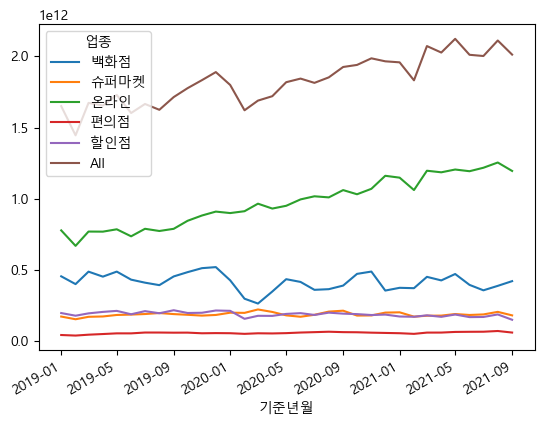

In [93]:
# index의 마지막 All을 제외하고 그래프로 표현

df2.drop('All', axis= 0).plot()

<Axes: xlabel='기준년월'>

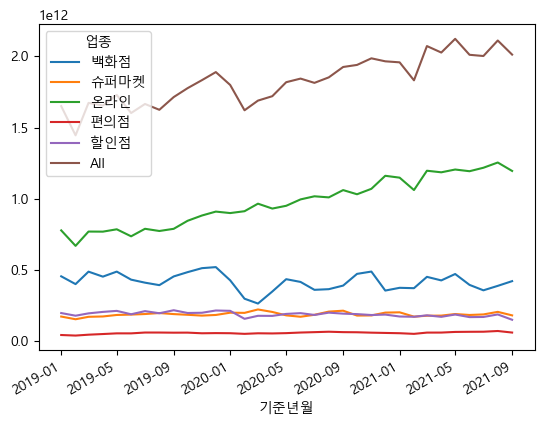

In [94]:
df2.iloc[:len(df2)-1].plot()

<Axes: xlabel='기준년월'>

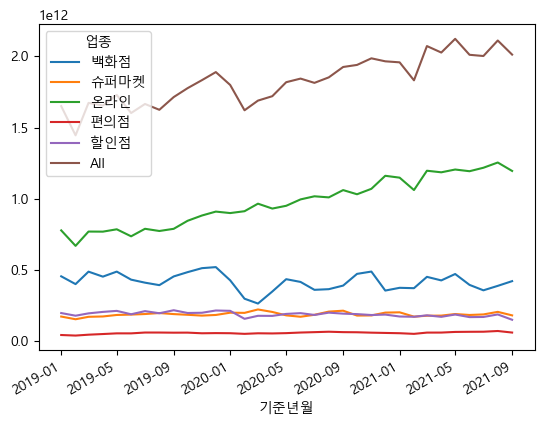

In [95]:
df2.iloc[:-1].plot()

In [102]:
# 온라인, 오프라인 업종별로 합산 그래프로 표현



df2['오프라인'] = df2['All'] - df2['온라인']

data = df2.iloc[:-1]

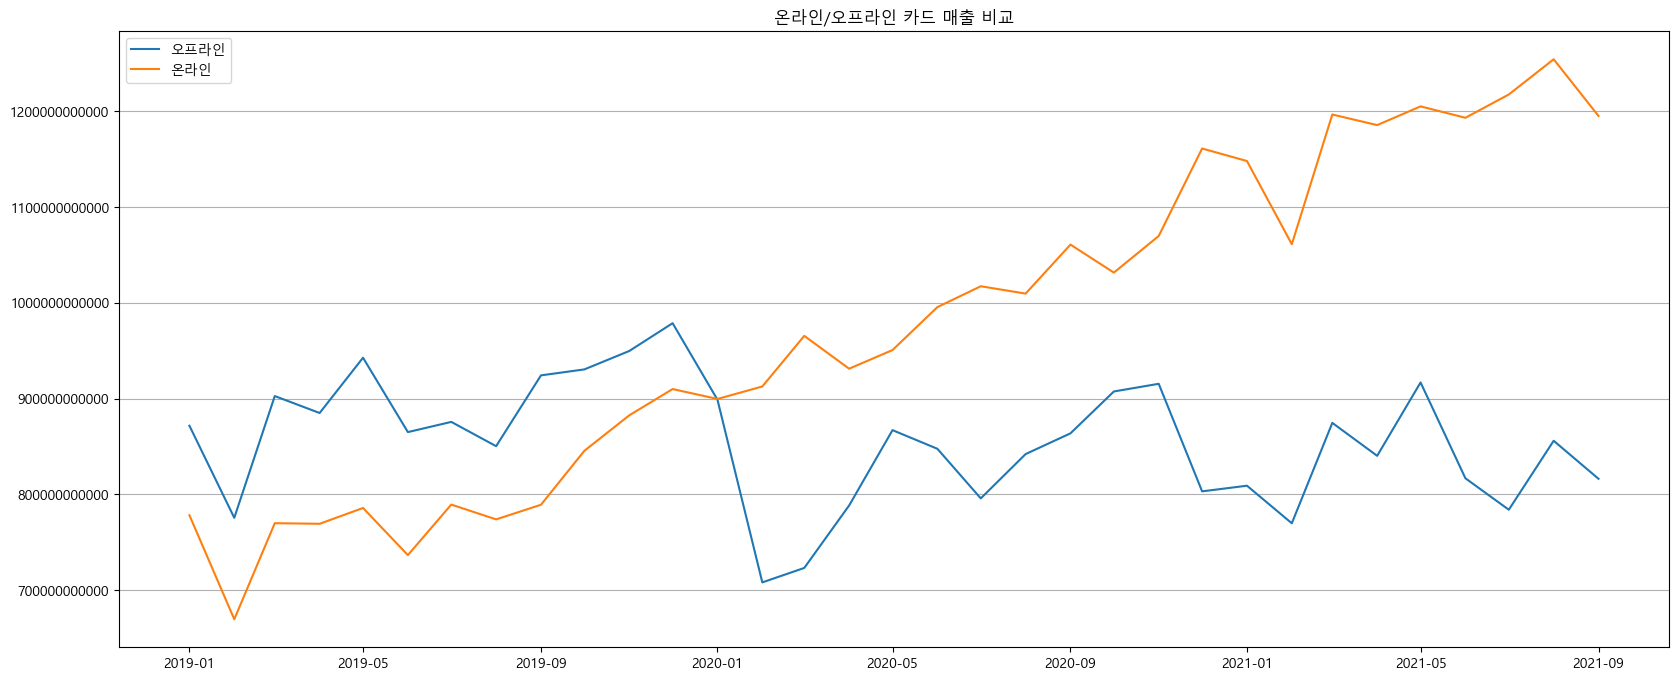

In [104]:
x = data.index # data['기준년월']도 됨
y1 = data['오프라인']
y2 = data['온라인']

# 그래프의 사이즈를 변경

plt.figure(figsize= (20, 8))

# 그래프에서 지수표현식 제거

plt.ticklabel_format(axis = 'y', style= 'plain')


# y축에 그리드 선을 추가

plt.grid(True, axis= 'y')

plt.plot(x, y1, label = '오프라인')
plt.plot(x, y2, label = '온라인')

# 그래프의 제목 추가

plt.title("온라인/오프라인 카드 매출 비교")

# 그래프에 범례 추가

plt.legend()

plt.show()